<a href="https://colab.research.google.com/github/jafetimbre/mib-fiesta/blob/master/src/imbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
print('Hello world')

Hello world


In [340]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [341]:
a = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing_data_cleaned.csv')
b = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/property_data_cleaned.csv')

In [342]:
a.head()

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,2014-10-13,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,2014-12-09,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
2,2014-12-09,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
3,2015-04-15,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
4,2014-05-27,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292


In [343]:
b.head()

,property_type,zip,neighborhood,latitude,longitude
0,K-12 School,98118,SOUTHEAST,47.545701,-122.268584
1,K-12 School,98112,SHARED: CENTRAL & EAST,47.623094,-122.305389
2,K-12 School,98125,NORTH,47.710115,-122.293792
3,K-12 School,98109,MAGNOLIA / QUEEN ANNE,47.633032,-122.352457
4,Office,98103,LAKE UNION,47.663916,-122.331722


In [344]:
b.property_type.unique()

array(['K-12 School', 'Office', 'Supermarket/Grocery Store',
       'Distribution Center', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Other', 'Hospital (General Medical & Surgical)',
       'College/University', 'Other - Lodging/Residential',
       'Residence Hall/Dormitory', 'Other/Specialty Hospital',
       'Financial Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Museum', 'Parking',
       'Mixed Use Property', 'Worship Facility', 'Data Center',
       'Laboratory', 'Other - Services', 'Strip Mall',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Other - Recreation', 'Lifestyle Center',
       'Other - Entertainment/Public Assembly',
       'Manufacturing/Industrial Plant', 'Restaurant',
       'Social/Meeting Hall', 'Other - Education',
       'Fitness Center/Health Club/Gym', 'Other - Mall',
       'Automobile Dealership', 'Residential Care Facility',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',

In [345]:
property_types = {
    'education': ['K-12 School', 'College/University', 'Other - Education', 'Adult Education', 'Pre-school/Daycare'],
    'culture': ['Museum', 'Social/Meeting Hall', 'Library', 'Performing Arts', 'Movie Theater'],
    'store': ['Supermarket/Grocery Store', 'Retail Store', 'Strip Mall', 'Other - Mall', 'Automobile Dealership'],
    'work': ['Office', 'Financial Office', 'Bank Branch'],
    'health': ['Medical Office', 'Hospital (General Medical & Surgical)', 'Other/Specialty Hospital', 'Urgent Care/Clinic/Other Outpatient'],
    'services': ['Parking', 'Other - Services', 'Restaurant', 'Residential Care Facility', 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Other - Utility'],
    'recreation': ['Other - Recreation', 'Lifestyle Center', 'Other - Entertainment/Public Assembly', 'Fitness Center/Health Club/Gym', 'Outpatient Rehabilitation/Physical Therapy']
}

In [346]:
filters = []
for i, el in property_types.items():
    filters.extend(el)

print(f'Elements rem:\n{b.property_type.unique()[np.isin(b.property_type.unique(), filters, invert=True)]}')

Elements rem:
['Distribution Center' 'Senior Care Community' 'Other'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Self-Storage Facility' 'Non-Refrigerated Warehouse' 'Mixed Use Property'
 'Worship Facility' 'Data Center' 'Laboratory'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse'
 'Manufacturing/Industrial Plant' 'Multifamily Housing']


In [347]:
def geographicDistance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 6378.1  # equatorial radius of Earth https://imagine.gsfc.nasa.gov/features/cosmic/earth_info.html
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R

In [348]:
min_distance = 1    # km

In [349]:
test_a = a[0:100]
test_b = b[0:100]

In [350]:
test_b = test_b[test_b['property_type'].isin(property_types['education'])]
test_b

,property_type,zip,neighborhood,latitude,longitude
0,K-12 School,98118,SOUTHEAST,47.545701,-122.268584
1,K-12 School,98112,SHARED: CENTRAL & EAST,47.623094,-122.305389
2,K-12 School,98125,NORTH,47.710115,-122.293792
3,K-12 School,98109,MAGNOLIA / QUEEN ANNE,47.633032,-122.352457
7,K-12 School,98199,MAGNOLIA / QUEEN ANNE,47.657262,-122.390651
8,K-12 School,98115,NORTHEAST,47.682450,-122.293935
11,K-12 School,98103,NORTHWEST,47.688948,-122.336162
12,K-12 School,98112,EAST,47.634455,-122.308016
16,K-12 School,98146,SOUTHWEST,47.509354,-122.378222
30,K-12 School,98106,DELRIDGE NEIGHBORHOODS,47.562613,-122.357928


In [351]:
a_cords = zip(test_a.lat, test_a.long)
b_cords = zip(test_b.latitude, test_b.longitude)

In [352]:
data_housing = a
data_properties = b

min_distance = 1           # km
compute_treshold = 0.05    # degrees

total = np.zeros(len(data_housing))

for key, values in property_types.items():
    counts = []

    filtered_prop_types = data_properties[data_properties['property_type'].isin(values)]

    for la_a, lo_a in zip(data_housing.lat, data_housing.long):
        num_count = 0
        for la_b, lo_b in zip(filtered_prop_types.latitude, filtered_prop_types.longitude):
            if (abs(la_a - la_b) > compute_treshold or abs(lo_a - lo_b) > compute_treshold):
                continue
            dist = geographicDistance((la_a, lo_a), (la_b, lo_b))
            if (dist <= min_distance):
                num_count += 1
        counts.append(num_count)
    

    # print(counts)
    data_housing[key] = counts
    total = np.add(total, counts)

data_housing['total_score'] = total

In [353]:
data_housing

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long,education,culture,store,work,health,services,recreation,total_score
0,2014-10-13,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,1,0,0,0,0,0,0,1.0
1,2014-12-09,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319,4,0,1,0,0,0,0,5.0
2,2014-12-09,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393,0,1,0,0,0,0,0,1.0
3,2015-04-15,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337,2,0,0,0,0,0,0,2.0
4,2014-05-27,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292,5,0,2,0,0,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,2015-02-19,475000,3,2.50,121,119,2.0,0,3,8,12,2008,0,98116,47.5773,-122.409,1,0,0,0,0,0,0,1.0
7977,2014-05-21,360000,3,2.50,141,104,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346,1,1,1,3,0,0,0,6.0
7978,2015-02-23,400000,4,2.50,213,535,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362,1,0,0,0,0,0,0,1.0
7979,2014-06-23,402101,2,0.75,94,124,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299,5,0,3,6,1,0,0,15.0


In [354]:
price_m2 = []

for price, m2_lot in zip(data_housing.price, data_housing.m2_lot):
    price_m2.append(round(price/m2_lot, 2))

data_housing['price_m2'] = price_m2 

In [355]:
data_housing.head()

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long,education,culture,store,work,health,services,recreation,total_score,price_m2
0,2014-10-13,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,1,0,0,0,0,0,0,1.0,426.73
1,2014-12-09,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319,4,0,1,0,0,0,0,5.0,807.81
2,2014-12-09,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393,0,1,0,0,0,0,0,1.0,1313.04
3,2015-04-15,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337,2,0,0,0,0,0,0,2.0,334.06
4,2014-05-27,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292,5,0,2,0,0,0,0,7.0,847.83


In [356]:
data_housing.culture.unique()

array([0, 1, 2, 3, 4])

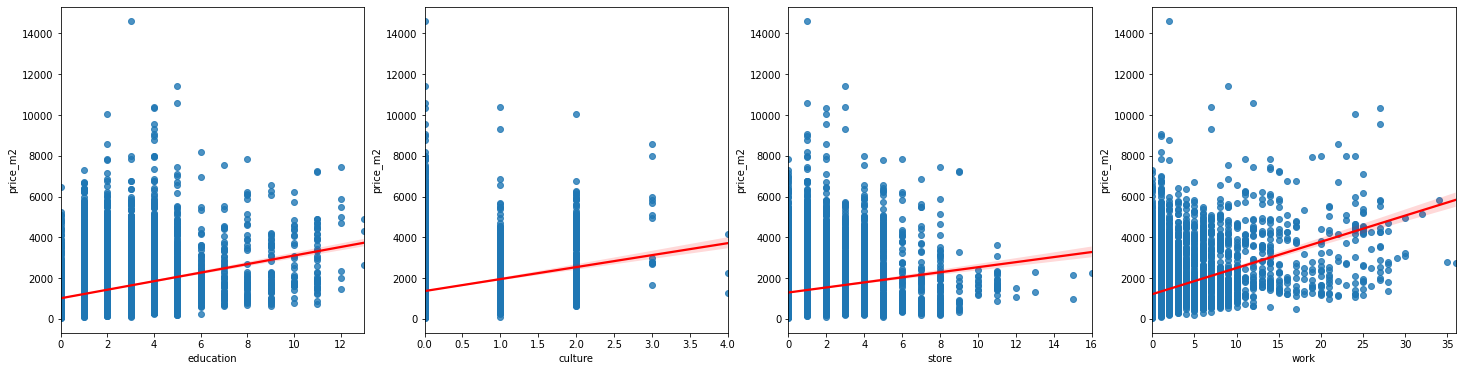

In [357]:
data = data_housing[data_housing.price < 1000000]

fig, axs = plt.subplots(1, 4, figsize=(25,6))

sns.regplot(x=data.education, y=data.price_m2, ax=axs[0], line_kws={'color':'red'})
# axs[0].set_title('asd')

sns.regplot(x=data.culture, y=data.price_m2, ax=axs[1], line_kws={'color':'red'})
# axs[1].set_title('asd')

sns.regplot(x=data.store, y=data.price_m2, ax=axs[2], line_kws={'color':'red'})
# axs[2].set_title('asd')

sns.regplot(x=data.work, y=data.price_m2, ax=axs[3], line_kws={'color':'red'})
# axs[3].set_title('asd')

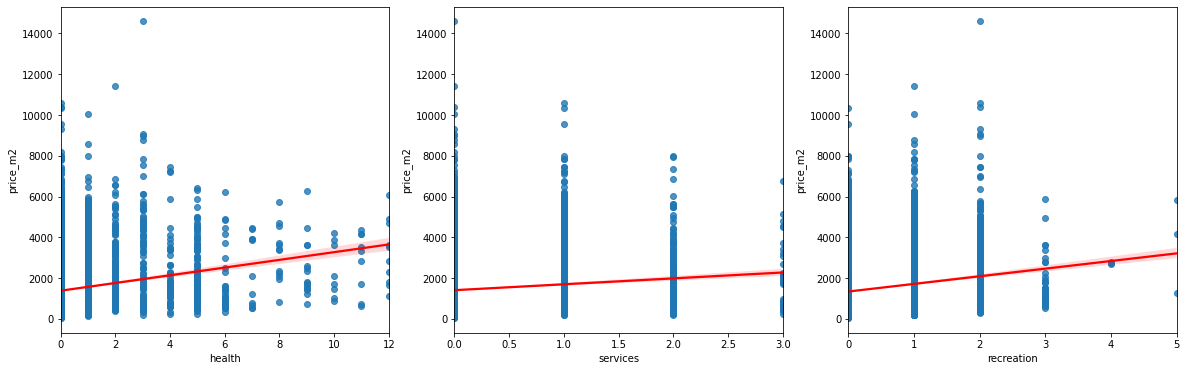

In [358]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))

sns.regplot(x=data.health, y=data.price_m2, ax=axs[0], line_kws={'color':'red'})
# axs[0].set_title('asd')

sns.regplot(x=data.services, y=data.price_m2, ax=axs[1], line_kws={'color':'red'})
# axs[1].set_title('asd')

sns.regplot(x=data.recreation, y=data.price_m2, ax=axs[2], line_kws={'color':'red'})
# axs[2].set_title('asd')

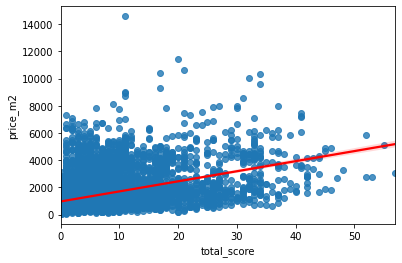

In [359]:
sns.regplot(x=data.total_score, y=data.price_m2, line_kws={'color':'red'})

(array([4.916e+03, 1.614e+03, 5.560e+02, 2.430e+02, 5.200e+01, 1.500e+01,
        5.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([   45.99 ,  1499.724,  2953.458,  4407.192,  5860.926,  7314.66 ,
         8768.394, 10222.128, 11675.862, 13129.596, 14583.33 ]),
 <a list of 10 Patch objects>)

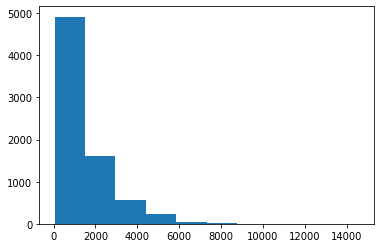

In [360]:
plt.hist(data.price_m2, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


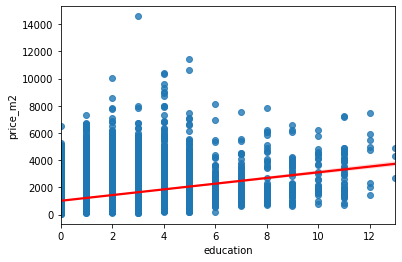

In [361]:
import seaborn as sns

sns.regplot(data.education, data.price_m2, line_kws={'color':'red'})

In [362]:
data.date[0]

'2014-10-13'

In [363]:
import datetime

In [364]:
date_time_str = '20141013T000000'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%dT%H%M%S')
date_time_obj

datetime.datetime(2014, 10, 13, 0, 0)